# Running Random Forest Model on Reduced Data Set

In [49]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Load the data

In [50]:
# Path to the data directory
data_path = os.path.join(os.getcwd(), '../data_reduced')

# List of file names for each month
file_names = {
    'June': 'june_paper_features_unique.csv',
    'July': 'july_paper_features_unique.csv',
    'August': 'august_paper_features_unique.csv',
    'September': 'september_paper_features_unique.csv',
    'October': 'october_paper_features_unique.csv'
}

# Dictionary to store each month's data
monthly_data = {}

# Load each file and store in the dictionary
for month, file_name in file_names.items():
    file_path = os.path.join(data_path, file_name)
    monthly_data[month] = pd.read_csv(file_path)
    print(f"{month} data loaded successfully.")
    
# Access data for each month
june_df = monthly_data['June']
july_df = monthly_data['July']
aug_df = monthly_data['August']
sep_df = monthly_data['September']
oct_df = monthly_data['October']

June data loaded successfully.
July data loaded successfully.
August data loaded successfully.
September data loaded successfully.
October data loaded successfully.


# Training Model

In [51]:
# Define X (features) and y (target)

X_train = july_df.drop('device', axis=1)
y_train = july_df['device']

# Initialise the Random Forest Model with class weights to handle class imbalance
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42, n_jobs=-1)

# Train the model on July data
rf_model.fit(X_train, y_train)

print("Model trained on the entire July dataset.")

Model trained on the entire July dataset.


In [226]:
X_train.head(10)

,PacketCount,BytesCount,SmallPktCount,LargePktCount,NonEmptyPktCount,DataByteCount,AvgIAT,FirstNonEmptyPktSize,MaxPktSize,StdevPayloadSize,StdevIAT,reversePacketCount,reverseBytesCount,reverseSmallPktCount,reverseLargePktCount,reverseNonEmptyPktCount,reverseDataByteCount,reverseAvgIAT,reverseFirstNonEmptyPktSize,reverseMaxPktSize,reverseStdevPayloadSize,reverseStdevIAT,HTTP,HTTPS,DNS,NTP,TCP_others,UDP_others
0,56,3136,56,0,56,1568,32223,28,28,0,32225,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,336,0,1,1,308,0,308,308,0,0,1,336,0,1,1,308,0,308,308,0,0,0,0,0,0,0,1
2,56,3136,56,0,56,1568,32258,28,28,0,32224,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,56,3136,56,0,56,1568,32280,28,28,0,32221,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,56,3136,56,0,56,1568,32198,28,28,0,32174,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,47,3518,0,0,14,1638,38941,117,117,0,12909,47,5213,0,0,33,3333,38935,101,101,0,12777,0,1,0,0,1,0
6,56,3136,56,0,56,1568,32211,28,28,0,32195,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,56,3136,56,0,56,1568,32269,28,28,0,32199,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,56,3136,56,0,56,1568,32280,28,28,0,32286,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,56,3136,56,0,56,1568,32267,28,28,0,32294,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Testing the Model on all Subsequent Months

In [52]:
# Define the datasets for each month
datasets = {
    "June": june_df,
    "August": aug_df,
    "September": sep_df,
    "October": oct_df
}

results = []
for month, df in datasets.items():
    X_test = df.drop('device', axis=1)
    y_test = df['device']
    
    # Make predictions on the test set for the current month
    y_pred = rf_model.predict(X_test)
    
    # Calculate accuracy and F1 score
    accuracy = accuracy_score(y_test, y_pred)
    weighted_f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Append results to the list to keep track of all months
    results.append({
        'month': month,
        'accuracy': accuracy,
        'weighted_f1': weighted_f1
    })

# Convert results into a DataFrame for easy viewing
results_df = pd.DataFrame(results)
print("\nSummary of Model Evaluation Across Months:\n", results_df)


Summary of Model Evaluation Across Months:
        month  accuracy  weighted_f1
0       June  0.930237     0.931714
1     August  0.884766     0.880503
2  September  0.881607     0.899298
3    October  0.806946     0.765819


# Feature Importance

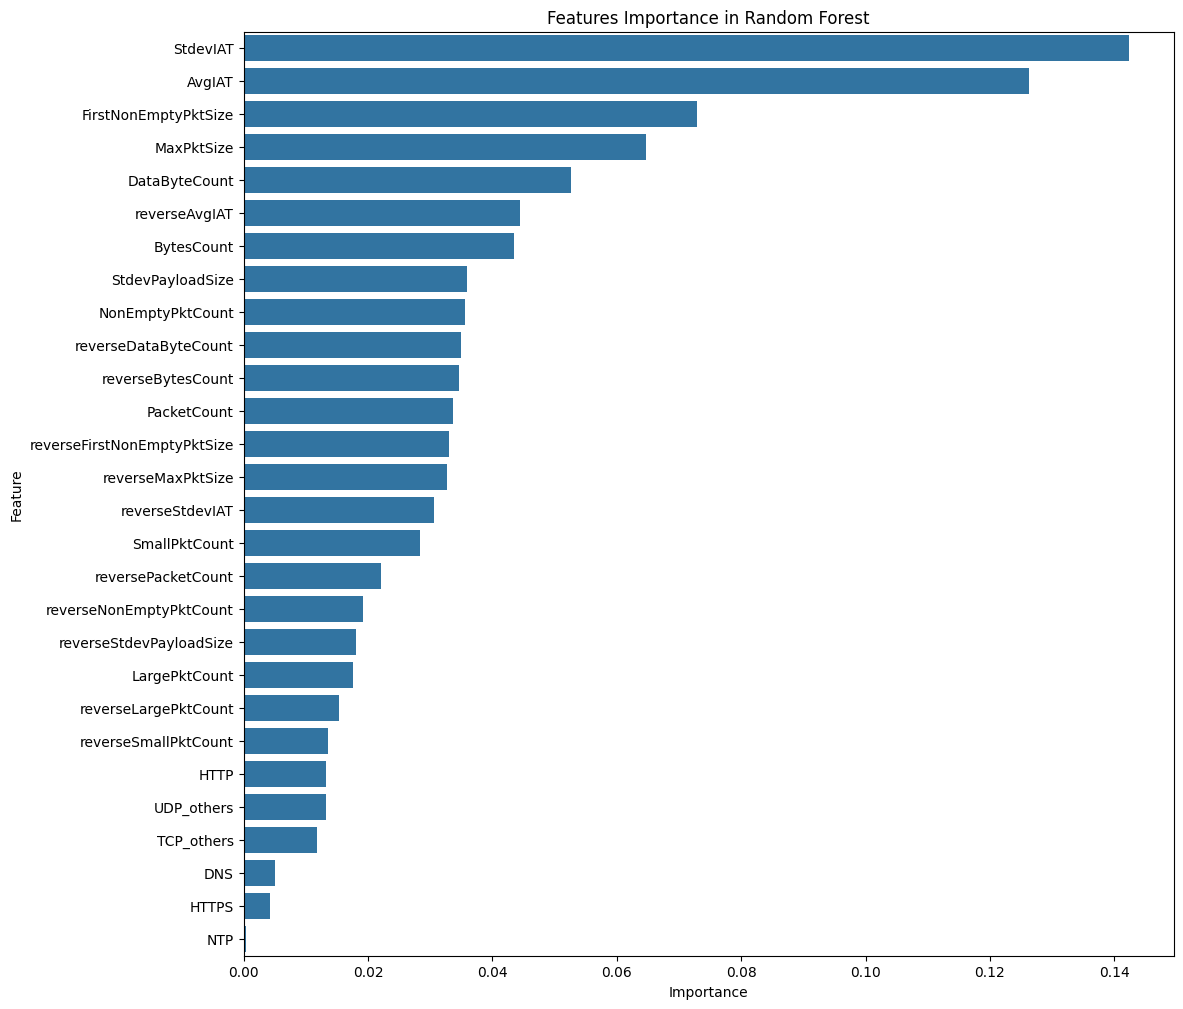

In [32]:
importances = rf_model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualise the top features
plt.figure(figsize=(12,12))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Features Importance in Random Forest')
plt.show()

## Insights
The results from the F1 scores after training the model on July data reveal a clear descending trend in F1 score values over time, suggesting that the model's performance declines on future data. This phenomenon is known as **Temporal Drift** and requires careful handling of features to improve model stability and predictive accuracy.

- **Remove Stable Features**: Identify features that remain largely unchanged across months, as they may not provide meaningful information for predicting future trends and could add unnecessary noise to the model.

- **Utilize Essential Time Series Features**: Identify features with significant variability across months, as these may capture useful temporal patterns in device behavior. These time-sensitive features could serve as foundational predictors. Consider normalizing or scaling them if they show extreme variability to enhance model stability.

# Calculate Coefficient of Variation (CV)
For each feature in each month.

1. To assess the variability of each feature relative to its mean, we calculate the coefficient of variation (CV). The CV is calculated using the formula:

    CV = Standard Deviation / Mean

2. After calculating the CV for each feature across all months, we compute the **CV Consistency**. This measures how stable each feature's variability is over time by calculating the coefficient of variation of the monthly CV values:

    CV Consistency = Standard Deviation of CVs / Mean of CVs

- Features with CV Consistency < 0.5 as stable.
- Features with CV Consistency between 0.5 and 1 as moderately variable.
- Features with CV Consistency > 1 as highly variable and likely time-sensitive.


In [18]:
# Calculate summary statistics for each month and store them
summary_stats = {}

for month, df in monthly_data.items():
    # Calculate mean and standard deviation for each feature in the current month's data
    stats = df.describe().loc[['mean', 'std']]
    
    # Calculate coefficient of variation (CV) for each feature
    cv = (stats.loc['std'] / stats.loc['mean'])
    cv.name = 'cv'
    
    # Store only the CV row with feature names as index
    summary_stats[month] = cv.to_frame()

# Combine the CV statistics into a single DataFrame with multi-level columns
cv_summary = pd.concat(summary_stats, axis=1, keys=summary_stats.keys())
cv_summary.columns.names = ['Month', 'Statistic']
cv_summary.index.name = 'Feature'

# Select only the 'cv' row across all months and display it
cv_only = cv_summary.xs('cv', level='Statistic', axis=1)

# Calculate CV consistency for each feature
cv_only['CV Consistency'] = cv_only.std(axis=1) / cv_only.mean(axis=1)

# Display the CV values for each feature across months and the calculated cv consistency value
print("\nCoefficient of Variation (CV) for Each Feature Across Months with CV Consistency:\n", cv_only)



Coefficient of Variation (CV) for Each Feature Across Months with CV Consistency:
 Month                             June        July      August   September   
Feature                                                                      
PacketCount                   3.306493   11.965718   13.672794   19.948476  \
BytesCount                    3.215098   27.086462    7.257328    9.704058   
SmallPktCount                 4.884673    6.242166    6.512924    6.743604   
LargePktCount                 4.142259   26.266613    8.343156    7.793458   
NonEmptyPktCount              3.216075   10.795746    5.477031    4.153730   
DataByteCount                 3.542030   31.125772    5.742976    5.451716   
AvgIAT                        2.246375    2.263308    1.785657    1.786846   
FirstNonEmptyPktSize          1.077708    1.157578    1.434720    1.485882   
MaxPktSize                    1.063011    1.136600    1.400031    1.464300   
StdevPayloadSize              1.241016    1.352968    1.90

# Identifying Features Causing Temporal Drift

List of Features to Drop:
['reverseAvgIAT', 'HTTPS', 'reverseFirstNonEmptyPktSize', 'DNS', 'reverseMaxPktSize', 'UDP_others', 'StdevPayloadSize', 'HTTP', 'SmallPktCount', 'reverseStdevPayloadSize', 'reverseStdevIAT', 'NTP', 'TCP_others']

In [23]:
# Filter features with CV Consistency < 0.5
low_cv_consistency_features = cv_only[cv_only['CV Consistency'] < 0.5]

# Extract the feature names for low CV Consistency into a list for easy access
features_with_low_cv = low_cv_consistency_features.index.tolist()

# Get feature importance data from Random Forest model
importances = rf_model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Filter importance_df to include only features with Importance < 0.06
low_importance_features = importance_df[importance_df['Importance'] < 0.06]['Feature'].tolist()

# Identify features that have both low CV Consistency and low Importance
features_to_drop = list(set(features_with_low_cv) & set(low_importance_features))

# Create a DataFrame for features to drop with their CV Consistency and Importance values
cv_consistency_df = low_cv_consistency_features[['CV Consistency']]
important_time_sensitive_features = importance_df[importance_df['Feature'].isin(features_to_drop)]
merged_df = important_time_sensitive_features.merge(cv_consistency_df, left_on='Feature', right_index=True)

# Sort by feature importance in descending order
merged_df = merged_df.sort_values(by='Importance', ascending=False)

# Display the features with their importance and CV Consistency values
print("\nLow-Importance, Stable Features (Candidates for Dropping):\n", merged_df)


Low-Importance, Stable Features (Candidates for Dropping):
                     Feature  Importance  CV Consistency
10          reverseStdevIAT    0.053193        0.115103
9   reverseStdevPayloadSize    0.042988        0.365437
15               TCP_others    0.025595        0.189875
11                     HTTP    0.024535        0.100684
16               UDP_others    0.020337        0.215812
12                    HTTPS    0.009013        0.143098
13                      DNS    0.008000        0.208416
14                      NTP    0.000509        0.421456


# Run the Model Without stable features
In this step, we drop all features with a **CV Consistency value < 0.5**. This threshold was chosen based on our earlier analysis, as features with a low CV Consistency value indicate stability over time, making them less relevant for capturing the temporal variability needed for our model. Additionally, these stable features were shown to have relatively low importance according to the feature importance values from our Random Forest model.

By removing these stable features, we created a more dynamic model that is better able to capture trends over time. Testing across months showed robust accuracy, making the model more efficient and better suited for generalizing to unseen data.


In [24]:
# Define X (features) and y (target) by dropping the stable features
X_train = july_df.drop(['device'] + features_to_drop, axis=1)
y_train = july_df['device']

# Initialize the Random Forest Model with class weights to handle class imbalance
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42, n_jobs=-1)

# Train the model on the July dataset
rf_model.fit(X_train, y_train)
print("Model trained on the entire July dataset.")

# Define the test datasets for each month
datasets = {
    "June": june_df,
    "August": aug_df,
    "September": sep_df,
    "October": oct_df
}

# Evaluate the model on each test set
results = []
for month, df in datasets.items():
    X_test = df.drop(['device'] + features_to_drop, axis=1)
    y_test = df['device']
    
    # Make predictions on the test set for the current month
    y_pred = rf_model.predict(X_test)
    
    # Calculate accuracy and F1 score
    accuracy = accuracy_score(y_test, y_pred)
    weighted_f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Append results to the list to keep track of all months
    results.append({
        'month': month,
        'accuracy': accuracy,
        'weighted_f1': weighted_f1
    })

# Convert results into a DataFrame for easy viewing
results_df = pd.DataFrame(results)
print("\nSummary of Model Evaluation Across Months:\n", results_df)


Model trained on the entire July dataset.

Summary of Model Evaluation Across Months:
        month  accuracy  weighted_f1
0       June  0.930276     0.930417
1     August  0.884054     0.879350
2  September  0.880809     0.897290
3    October  0.808647     0.767823


In [27]:
print(f"Number of features in X_test", X_test.shape[1])

Number of features in X_test 20


# Hyperparameter Tuning with Grid Search

To optimize our Random Forest model, we performed hyperparameter tuning using **Grid Search** with cross-validation. This process tests various parameter combinations to find the best settings for model performance.

### Tuning Details:
- **Parameter Grid**: Tested values for key parameters:
  - `n_estimators`: Number of trees in the forest
  - `max_depth`: Maximum depth of each tree
  - `min_samples_split`: Minimum samples needed to split a node
  - `min_samples_leaf`: Minimum samples required at each leaf
  - `max_features`: Number of features considered at each split
- **Scoring Metric**: `f1_weighted` with 5-fold cross-validation

After finding the optimal parameters, we’ll retrain the model and assess its performance across the test sets.

---

This tuning process aims to improve the model's accuracy and stability across months.


In [242]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],          # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],         # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],           # Minimum number of samples required at each leaf node
    'max_features': ['auto', 'sqrt', 'log2'] # Number of features to consider when looking for the best split
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1)

# Set up Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=2)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best F1 Score from Cross-Validation:", best_score)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\hamza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters: {'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best F1 Score from Cross-Validation: 0.9230973830446878


# Final Model With Hyperparameters and Time Sensitive Features

In [22]:
# Define X (features) and y (target) by dropping the time-sensitive features
X_train = july_df.drop(['device'] + features_to_drop, axis=1)
y_train = july_df['device']

# Initialize the Random Forest Model with the optimized hyperparameters
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=30,
    max_features='sqrt',  # as per the FutureWarning, 'sqrt' is equivalent to 'auto'
    min_samples_leaf=2,
    min_samples_split=2,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# Train the model on the July dataset
rf_model.fit(X_train, y_train)
print("Model trained on the entire July dataset.")

# Define the test datasets for each month
datasets = {
    "June": june_df,
    "August": aug_df,
    "September": sep_df,
    "October": oct_df
}

# Evaluate the model on each test set
results = []
for month, df in datasets.items():
    X_test = df.drop(['device'] + features_to_drop, axis=1)
    y_test = df['device']
    
    # Make predictions on the test set for the current month
    y_pred = rf_model.predict(X_test)
    
    # Calculate accuracy and F1 score
    accuracy = accuracy_score(y_test, y_pred)
    weighted_f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Append results to the list to keep track of all months
    results.append({
        'month': month,
        'accuracy': accuracy,
        'weighted_f1': weighted_f1
    })

# Convert results into a DataFrame for easy viewing
results_df = pd.DataFrame(results)
print("\nSummary of Model Evaluation Across Months:\n", results_df)

Model trained on the entire July dataset.

Summary of Model Evaluation Across Months:
        month  accuracy  weighted_f1
0       June  0.919401     0.928729
1     August  0.878908     0.886257
2  September  0.880179     0.892520
3    October  0.811005     0.774736


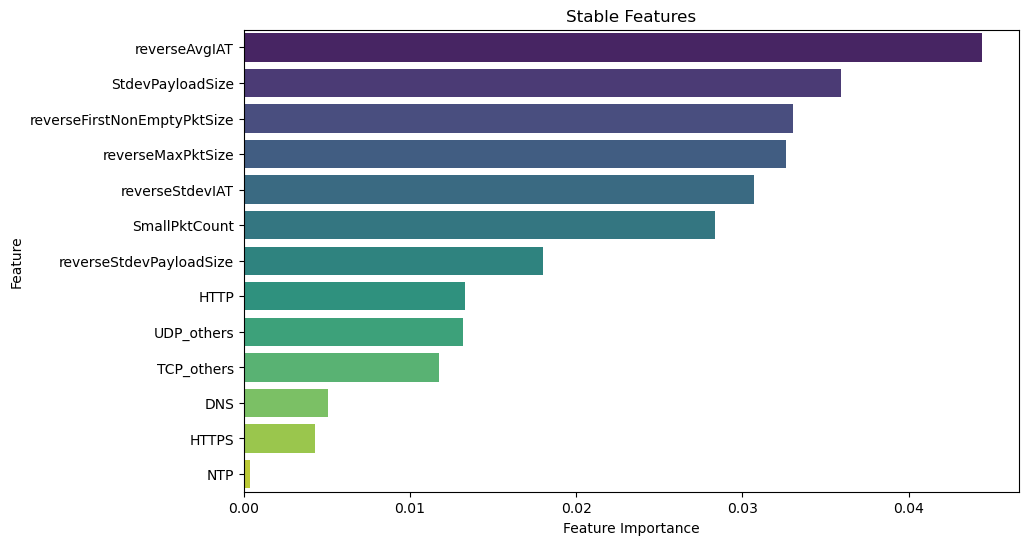

In [ ]:
# Intersect features_to_drop with feature names in the model's feature set
features_to_drop_valid = [feature for feature in features_to_drop if feature in importance_df['Feature'].values]

# Check if any features are found; if not, warn the user
if not features_to_drop_valid:
    print("No matching features to drop were found in the trained model's feature set.")
else:
    # Filter importance_df to include only features in the validated features_to_drop list
    dropped_features_importance_df = importance_df[importance_df['Feature'].isin(features_to_drop_valid)]
    
    # Sort by importance for better visualization
    dropped_features_importance_df = dropped_features_importance_df.sort_values(by='Importance', ascending=False)
    
    # Plot the feature importance of the dropped features
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=dropped_features_importance_df, palette='viridis')
    plt.title('Stable Features')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.show()

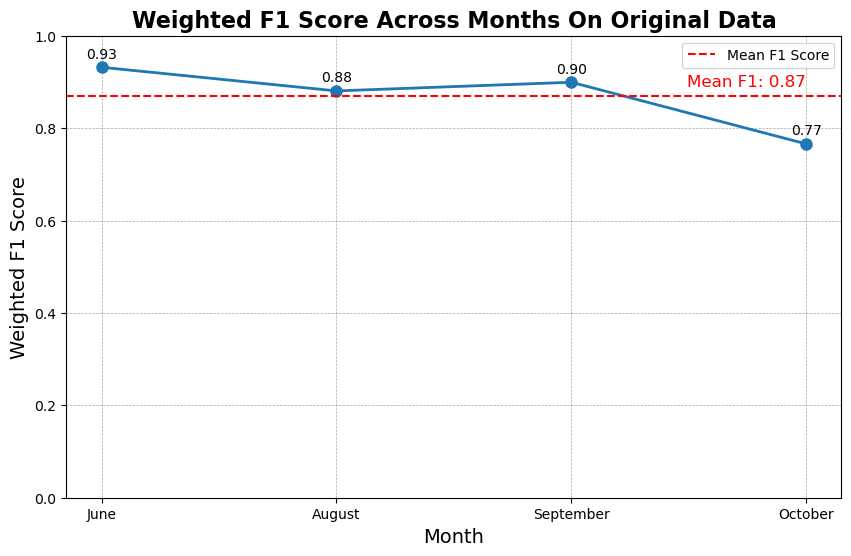

In [37]:
# Data from the Model Evaluation Across Months
data = {
    "month": ["June", "August", "September", "October"],
    "weighted_f1": [0.931714, 0.880503, 0.899298, 0.765819]
}
results_df = pd.DataFrame(data)

# Plotting the weighted F1 scores over time with improved styling
plt.figure(figsize=(10, 6))
plt.plot(
    results_df["month"], results_df["weighted_f1"],
    marker='o', markersize=8, linestyle='-', linewidth=2, color='#1f77b4'
)
plt.title("Weighted F1 Score Across Months On Original Data", fontsize=16, fontweight='bold')
plt.xlabel("Month", fontsize=14)
plt.ylabel("Weighted F1 Score", fontsize=14)
plt.ylim(0, 1)  # Ensuring F1 scores are scaled from 0 to 1 for better contrast

# Mean F1 score line and label
mean_f1_score = results_df["weighted_f1"].mean()
plt.text(len(results_df) - 1, mean_f1_score + 0.02, f"Mean F1: {mean_f1_score:.2f}", color='red', ha='right', fontsize=12)

# Add a grid and highlight the trend
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.axhline(y=results_df["weighted_f1"].mean(), color='red', linestyle='--', label="Mean F1 Score")
plt.legend()

# Add labels to each point
for i, row in results_df.iterrows():
    plt.text(row["month"], row["weighted_f1"] + 0.02, f"{row['weighted_f1']:.2f}", ha='center')

plt.show()

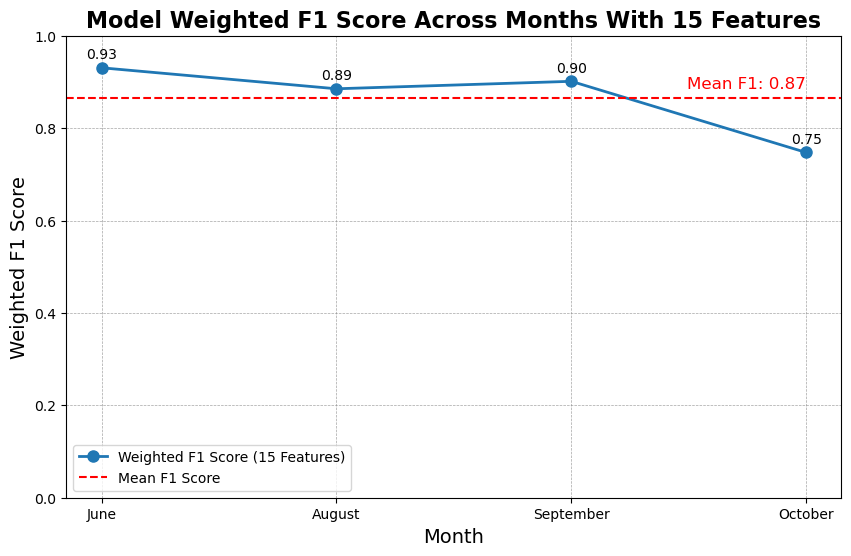

In [42]:
# Plotting the Weighted F1 Score over time for the model with 15 features
plt.figure(figsize=(10, 6))

# Plot Weighted F1 Score
plt.plot(
    results_df["month"], results_df["weighted_f1"],
    marker='o', markersize=8, linestyle='-', linewidth=2, label='Weighted F1 Score (15 Features)'
)

# Titles and labels
plt.title("Model Weighted F1 Score Across Months With 15 Features", fontsize=16, fontweight='bold')
plt.xlabel("Month", fontsize=14)
plt.ylabel("Weighted F1 Score", fontsize=14)
plt.ylim(0, 1)  # Set y-axis to standard score range for clarity

# Add grid and annotate points with exact values
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Mean F1 score line and label
mean_f1_score = results_df["weighted_f1"].mean()
plt.axhline(y=mean_f1_score, color='red', linestyle='--', label="Mean F1 Score")
plt.text(len(results_df) - 1, mean_f1_score + 0.02, f"Mean F1: {mean_f1_score:.2f}", color='red', ha='right', fontsize=12)

# Annotate each point with its exact F1 score
for i, row in results_df.iterrows():
    plt.text(row["month"], row["weighted_f1"] + 0.02, f"{row['weighted_f1']:.2f}", ha='center')

plt.legend(loc="best")
plt.show()

# CV values only for July Data Set
Calculate CV values only for test set (July) to avoid data leakage.

Testing on July reveals the same stable features to drop as before

Features with CV > 10 to be dropped:
 ['PacketCount', 'BytesCount', 'LargePktCount', 'NonEmptyPktCount', 'DataByteCount', 'reversePacketCount', 'reverseBytesCount', 'reverseSmallPktCount', 'reverseNonEmptyPktCount', 'reverseDataByteCount', 'NTP']

In [46]:
# Assume 'monthly_data' is a dictionary containing dataframes for each month
july_data = monthly_data['July']

# Calculate mean and standard deviation for each feature in the July data
stats = july_data.describe().loc[['mean', 'std']]

# Calculate coefficient of variation (CV) for each feature
cv = (stats.loc['std'] / stats.loc['mean'])
cv.name = 'CV'

# Convert the CV Series to a DataFrame for better presentation
cv_summary = cv.to_frame()

# Filter to select features with CV > 10
features_to_drop = cv_summary[cv_summary['CV'] > 10].index.tolist()

# Display the CV values for each feature in the July dataset
print("\nCoefficient of Variation (CV) for Each Feature in July:\n", cv_summary)
print("\nFeatures with CV > 10 to be dropped:\n", features_to_drop)



Coefficient of Variation (CV) for Each Feature in July:
                                      CV
PacketCount                   11.965718
BytesCount                    27.086462
SmallPktCount                  6.242166
LargePktCount                 26.266613
NonEmptyPktCount              10.795746
DataByteCount                 31.125772
AvgIAT                         2.263308
FirstNonEmptyPktSize           1.157578
MaxPktSize                     1.136600
StdevPayloadSize               1.352968
StdevIAT                       1.838181
reversePacketCount            14.581864
reverseBytesCount             42.548762
reverseSmallPktCount          28.505945
reverseLargePktCount           7.428159
reverseNonEmptyPktCount      473.803943
reverseDataByteCount          10.099536
reverseAvgIAT                  3.222357
reverseFirstNonEmptyPktSize    1.933737
reverseMaxPktSize              1.019802
reverseStdevPayloadSize        8.927873
reverseStdevIAT                2.530453
HTTP                  

# Running the model with Hyperparameters and stable features dropped

In [47]:
# Define X (features) and y (target) by excluding time-sensitive features from the July dataset
X_train = july_df.drop(['device'] + features_to_drop, axis=1)
y_train = july_df['device']

# Initialize the Random Forest Model with the optimized hyperparameters
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=30,
    max_features='sqrt',  # Using 'sqrt' as recommended to avoid FutureWarning with 'auto'
    min_samples_leaf=2,
    min_samples_split=2,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# Train the model on the July dataset
rf_model.fit(X_train, y_train)
print("Model trained on the entire July dataset.")

# Define the test datasets for each month, ensuring they are pre-loaded into your environment
datasets = {
    "June": june_df,
    "August": aug_df,
    "September": sep_df,
    "October": oct_df
}

# Evaluate the model on each test dataset
results = []
for month, df in datasets.items():
    X_test = df.drop(['device'] + features_to_drop, axis=1)
    y_test = df['device']
    
    # Make predictions on the test set for the current month
    y_pred = rf_model.predict(X_test)
    
    # Calculate accuracy and F1 score
    accuracy = accuracy_score(y_test, y_pred)
    weighted_f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Append results to the list to keep track of performance across months
    results.append({
        'month': month,
        'accuracy': accuracy,
        'weighted_f1': weighted_f1
    })

# Convert results into a DataFrame for easy viewing and analysis
results_df = pd.DataFrame(results)
print("\nSummary of Model Evaluation Across Months:\n", results_df)


Model trained on the entire July dataset.

Summary of Model Evaluation Across Months:
        month  accuracy  weighted_f1
0       June  0.920169     0.928473
1     August  0.879437     0.888697
2  September  0.880339     0.894909
3    October  0.809033     0.768644


C:\Users\hamza\AppData\Local\Temp\ipykernel_22784\1481487307.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=dropped_features_importance_df, palette='viridis')


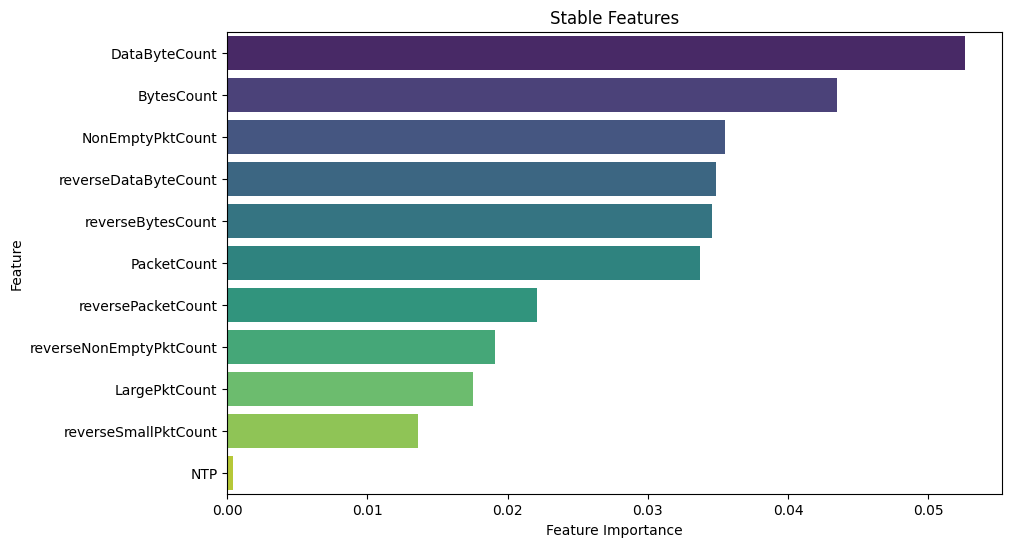

In [48]:
# Intersect features_to_drop with feature names in the model's feature set
features_to_drop_valid = [feature for feature in features_to_drop if feature in importance_df['Feature'].values]

# Check if any features are found; if not, warn the user
if not features_to_drop_valid:
    print("No matching features to drop were found in the trained model's feature set.")
else:
    # Filter importance_df to include only features in the validated features_to_drop list
    dropped_features_importance_df = importance_df[importance_df['Feature'].isin(features_to_drop_valid)]
    
    # Sort by importance for better visualization
    dropped_features_importance_df = dropped_features_importance_df.sort_values(by='Importance', ascending=False)
    
    # Plot the feature importance of the dropped features
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=dropped_features_importance_df, palette='viridis')
    plt.title('Stable Features')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.show()

# Testing Random Forest Model with rolling window analysis

In [ ]:
# Initialize results storage
results = []

# Define the initial training period and the total months available
initial_months = ['June', 'July', 'August']  # Initial training with three months
subsequent_months = ['September', 'October']  # Months to test and roll into training

# Start by training the model using data from the initial months
train_df = pd.concat([monthly_data[month] for month in initial_months])
X_train = train_df.drop('device', axis=1)
y_train = train_df['device']

# Train the initial model
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Now process each subsequent month
for month in subsequent_months:
    # Load the test set
    test_df = monthly_data[month]
    X_test = test_df.drop('device', axis=1)
    y_test = test_df['device']

    # Make predictions and evaluate the model
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    weighted_f1 = f1_score(y_test, y_pred, average='weighted')

    # Append results
    results.append({'month': month, 'accuracy': accuracy, 'weighted_f1': weighted_f1})

    # Add the current month's data to the training set (roll window)
    train_df = pd.concat([train_df, test_df]).tail(X_train.shape[0] + X_test.shape[0])  # keep the dataset size constant
    X_train = train_df.drop('device', axis=1)
    y_train = train_df['device']

    # Re-train the model with the updated dataset
    rf_model.fit(X_train, y_train)

# Display results
results_df = pd.DataFrame(results)
print("\nSummary of Model Evaluation Across Months:\n", results_df)



Summary of Model Evaluation Across Months:
        month  accuracy  weighted_f1
0  September  0.893115     0.903759
1    October  0.815490     0.799115
